# Chapter 09. 추천 시스템
***pg. 562~579
## 01. 추천 시스템의 개요와 배경
### 추천 시스템의 개요
- 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 제공

### 온라인 스토어의 필수 요소, 추천 시스템
- 사용자가 무엇을 원하는지 빠르게 찾아내 사용자의 온라인 쇼핑의 즐거움을 배가시킴
- 추천 시스템을 구성하는 데 사용될 수 있는 데이터들
 - 사용자가 어떤 상품을 구매했는가?
 - 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
 - 사용자가 평가한 영화 평점은? 제품 평가는?
 - 사용자가 스스로 작성한 자신의 취향은?
 - 사용자가 무엇을 클릭했는가?
 
### 추천 시스템의 유형
- 콘텐츠 기반 필터링 방식 (content baed filtering)
- 협업 필터링 방식 (collaborative filtering)
 - `최근접 이웃(nearest neighbor)` 협업 필터링
 - `잠재 요인(latent factor)` 협업 필터링

## 02. 콘텐츠 기반 필터링 추천 시스템
- 사용자가 높게 평가한 콘텐츠를 감안해 적절하게 매칭되는 콘텐츠를 추천
- 콘텐츠와 유사한 다른 콘텐츠 추천

## 03. 최근접 이웃 협업 필터링
- 사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(user behvior)만을 기반으로 추천을 수행
- 사용자-아이템 평점 매트릭스와 같은 축적된 사용자 행동 데이터만을 기반으로 사용자가 아직 평가하지 않은 아이템을 예측 평가
- 사용자-아이템 평점 행렬 : 많은 아이템을 열로 가지는 다차원 행렬, 희소 행렬 특성을 가짐
- 희소 행렬이라는 특징이 있으므로 유사도 측정시 주로 코사인 유사도를 이용

#### 최근접 이웃 협업 필터링 : 메모리 협업 필터링
 1. `사용자 기반(User-User)` : 당신과 비슷한 고객들이 다음 상품도 구매했습니다
 - 특정 사용자와 유사한 다른 사용자를 TOP-N으로 선정해 TOP-N 사용자가 좋아하는 아이템을 추천
 - 특정 사용자와 타 사용자 간의 유사도를 측정한 뒤 가장 유사도가 높은 TOP-N 사용자를 추출해 그들이 선호하는 아이켐을 추출
 - 행 : 개별 사용자, 열 : 개별 아이템
 2. `아이템 기반(Item-Item)` : 이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다
 - 아이템이 가지는 속성과는 상관없이 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천
 - 행 : 개별 아이템, 열 : 개별 사용자
 - 일반적으로 사용자 기반보다 정확도가 높음
 
## 04. 잠재 요인 협업 필터링
### 잠재 요인 협업 필터링의 이해
- 사용자-아이템 평점 매트릭스 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법
- `행렬 분해(matrix factorization)` : 대규모 다차원 행렬을 SVD와 같은 차원 감소 기법으로 분해하는 과정에서 잠재 요인 추출
> - 잠재요인을 기반으로 다차원 희소 행렬인 사용자 아이템 행렬 데이터를 저차원 밀집 행렬의 사용자-잠재요인 행렬과 아이템-잠재요인 행렬의 전치 행렬(잠재요인-아이템 행렬)로 분해
> - 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 생성
> - 분해된 데이터 세트의 내적곱 결합을 통해 사용자가 아직 평점을 부여하지 않은 아이템에 대한 예측 평점을 생성

- 잠재요인 example : 영화 평점 기반의 사용자-아이템 평점 행렬 데이터에서 영화가 가지는 장르별 특성 선호도
 - 사용자-잠재요인 행렬 : 사용자의 영화 장르에 대한 선호도로 정의됨
 - 아이템-잠재요인 행렬 : 영화의 장르별 특성값으로 정의됨
 - 아래의 그림에서 User1이 평점을 매기지 못한 Item 2에 대해 행렬 분해된 P 매트릭스의 User1 벡터와 Q.T 매트릭스의 Item 2 벡터의 내적 결괏값으로 예측 가능

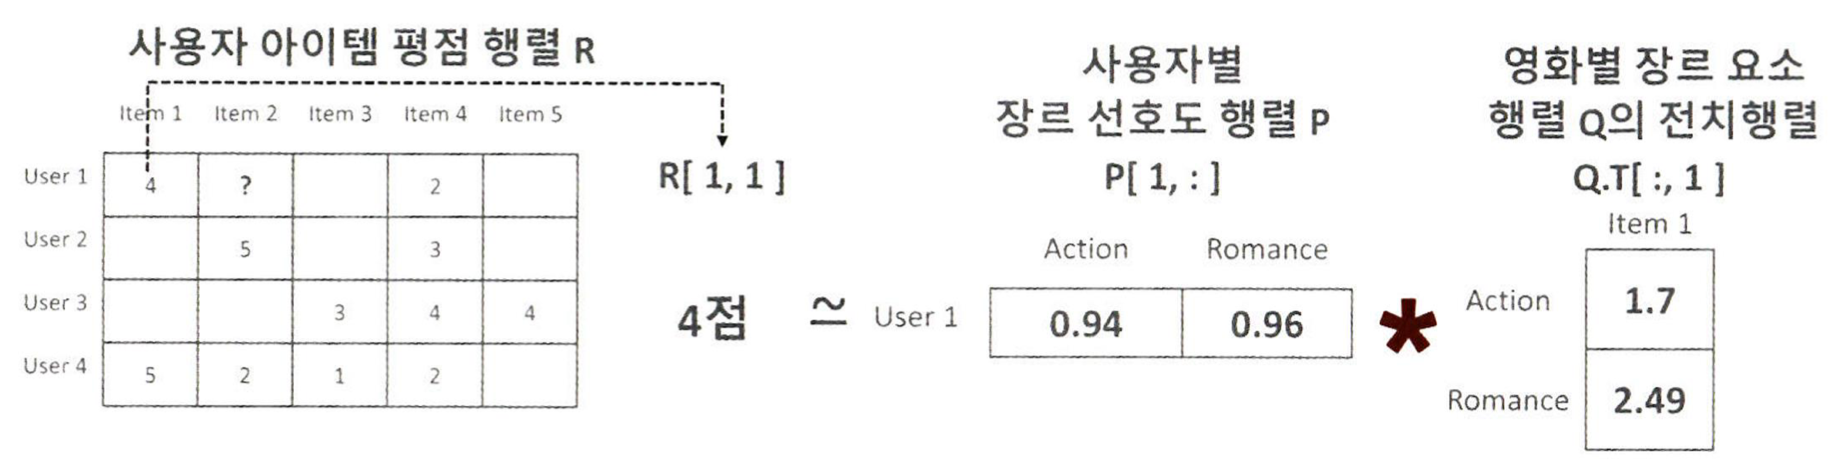

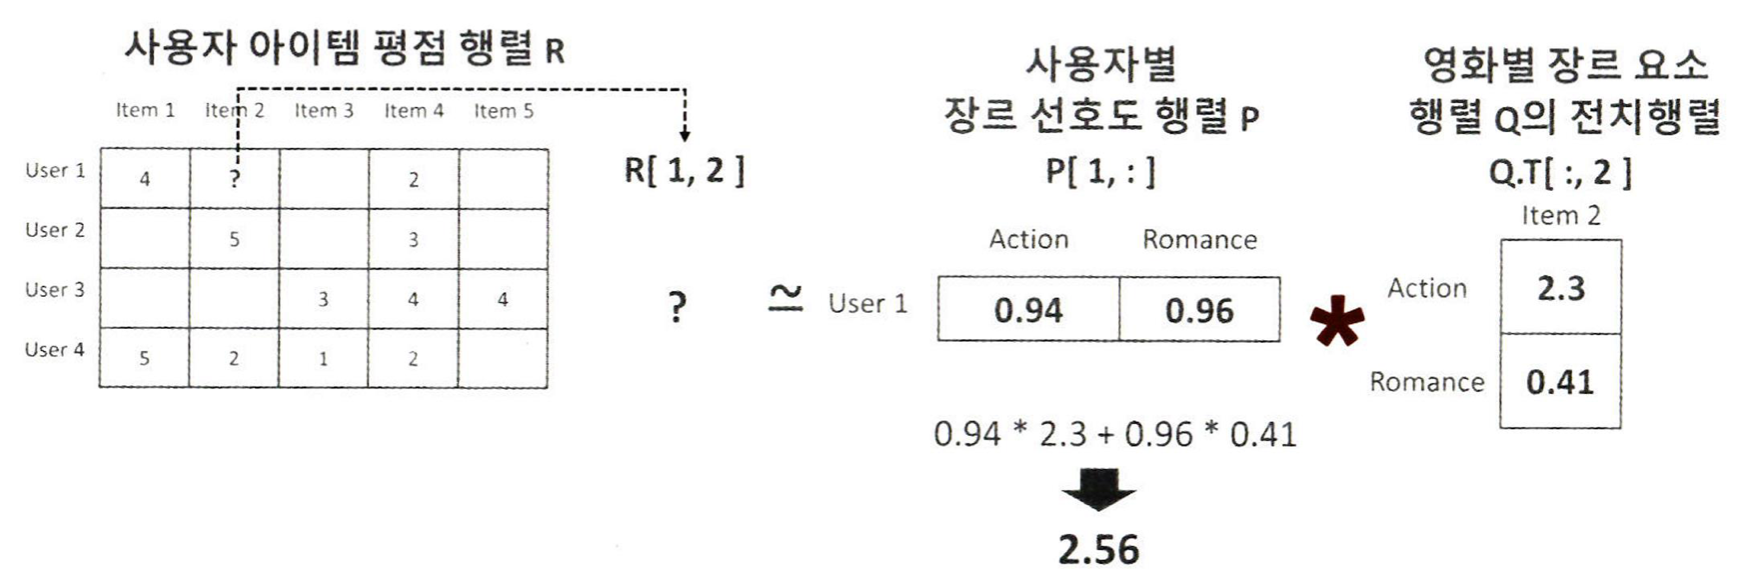

### 행렬 분해의 이해
- `행렬 분해` : 다차원의 매트릭스를 저차원의 매트릭스로 분해하는 기법
 - SVD(Singular Vector Decomposition) 
   - NaN 값이 없는 행렬에만 적용 가능
   - NaN 값이 있는 경우 SGD(stochastic gradient descent), ALS(alternating least squares) 방식을 이용해 SVD를 수행
 - NMF(Non-Negative Matrix Factorization)

- M개의 사용자(user) 행과 N개의 아이템(item) 열을 가진 평점 행렬 R (M*N)은
- 행렬 분해를 통해 사용자-K차원 잠재요인 행렬 P (M*K)와
- K차원 잠재요인-아이템 행렬 Q.T (K*N)로 분해 가능
 - 고차원 희소 행렬 R을 저차원 밀집 행렬인 P 행렬과 Q 행렬로 분해
 - R 행렬의 평점 데이터 
 - $r_{(u.i)} = p_u * q_i^t$
   - $p_u$ : P 행렬에서 u행 사용자의 벡터
   - $q_i^t$ : Q 행렬의 i행 아이템 벡터의 전치 벡터
   - 사용자가 평가하지 않은 아이템에 대한 평점도 잠재 요인으로 분해된 P, Q 행렬을 이용해 예측 가능
   
> $R ≈ \hat R = P*Q.T$

### 확률적 경사 하강법을 이용한 행렬 분해
- P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 최소의 오류를 가질 수 있도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추
1. P와 Q를 임의의 값을 가진 행렬로 설정
2. P와 Q.T 값을 곱해 예측 R 행렬을 계산하고 예측 R 행렬과 실제 R 행렬에 해당하는 오류 값 계산
3. 오류 값을 최소화할 수 있도록 P와 Q 행렬을 적절한 값으로 각각 업데이트
4. 만족할 만한 오류 값을 가질 때까지 2, 3번 작업을 반복하며 P와 Q 값을 업데이트해 근사화

- 실제 값과 예측값의 오류 최소화와 L2 규제를 고려한 비용함수식
 - $min \sum(r_{(u,i)} - p_u q_i^t)^2 + \lambda(∥q_i∥^2+∥p_u∥^2)$
 - 비용함수식을 최소화하기 위해서 새롭게 업데이트되는 $p_u'$
 - $ p_u' = p_u +  η(e_{(u,i)}*q_i - \lambda * p_u)$ 수정
 - $ q_i' = q_i +  η(e_{(u,i)}*p_u - \lambda * q_i)$
   - `η` : SGD 학습률
   - `$e_{(u,i)}$` : u행, i열에 위치한 실제 행렬 값과 예측 행렬 값의 차이 오류
   - `$\lambda$` : L2 규제 계수

In [9]:
# SGD 이용 행렬 분해 예제 구현
import numpy as np

# 원본 행렬 R 생성, 분해 행렬 P와 Q 초기화, 잠재 요인 차원 k는 3으로 설정
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN],
             [np.NaN, 5, np.NaN, 3, 1],
             [np.NaN, np.NaN, 3, 4, 4],
             [5,2,1,2,np.NaN]])
num_users, num_items = R.shape
K=3

# P와 Q 행렬의 크기를 지정하고 정규 분포를 가진 임의의 값으로 입력
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

# 실제 R 행렬과 예측 행렬의 오차를 구하는 함수
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error=0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출해 실제 R 행렬과 예측 R 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

In [11]:
# 행렬 분해 수행


# R>0인 행 위치, 열 위치, 값을 non_zeros 리스트에 저장
non_zeros = [(i,j,R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] >0]

               
steps = 1000
learning_rate=0.01
r_lambda = 0.01
               
# SGD 기법으로 P와 Q 매트릭스를 계속 업데이트
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 구함
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # regulazation을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij*Q[j,:] - r_lambda*P[i,:])
        Q[i,:] = Q[j,:] + learning_rate*(eij*P[i,:] - r_lambda*Q[j,:])
        
        rmse = get_rmse(R, P, Q, non_zeros)
        if (step % 50) == 0:
            print('### iteration step :', step, " rmse : ", rmse)

### iteration step : 0  rmse :  3.266852418749675
### iteration step : 0  rmse :  3.2673495185790884
### iteration step : 0  rmse :  3.2572776899490625
### iteration step : 0  rmse :  3.2627890080697317
### iteration step : 0  rmse :  3.268631697547181
### iteration step : 0  rmse :  3.2674202219042665
### iteration step : 0  rmse :  3.254797310466781
### iteration step : 0  rmse :  3.25272516024689
### iteration step : 0  rmse :  3.245914573570025
### iteration step : 0  rmse :  3.242505461533221
### iteration step : 0  rmse :  3.2428591804227325
### iteration step : 0  rmse :  3.2407685144797593
### iteration step : 50  rmse :  2.5572275057281058
### iteration step : 50  rmse :  2.577934815169638
### iteration step : 50  rmse :  2.5555809423412716
### iteration step : 50  rmse :  2.5399723934051335
### iteration step : 50  rmse :  2.574950017746955
### iteration step : 50  rmse :  2.5666987695017474
### iteration step : 50  rmse :  2.5582329411320828
### iteration step : 50  rmse :  

### iteration step : 750  rmse :  1.4561703046891943
### iteration step : 750  rmse :  1.6295122774166175
### iteration step : 750  rmse :  1.4376632850507998
### iteration step : 750  rmse :  1.495461093548285
### iteration step : 750  rmse :  1.6295679095273299
### iteration step : 750  rmse :  1.5893661039304827
### iteration step : 750  rmse :  1.6209259791677055
### iteration step : 750  rmse :  1.6295134431838219
### iteration step : 750  rmse :  1.6758481367570282
### iteration step : 750  rmse :  1.678247507262666
### iteration step : 750  rmse :  1.627152301949008
### iteration step : 750  rmse :  1.6295276863028396
### iteration step : 800  rmse :  1.458726691137092
### iteration step : 800  rmse :  1.6357633953082114
### iteration step : 800  rmse :  1.4421846931982274
### iteration step : 800  rmse :  1.5005207400117653
### iteration step : 800  rmse :  1.6358129541455164
### iteration step : 800  rmse :  1.5939587488181453
### iteration step : 800  rmse :  1.62671752804503

In [13]:
# 분해된 P, Q 함수로 예측 행렬 만들어서 출력
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[2.228 1.861 3.348 2.528 2.856]
 [2.175 1.816 3.271 2.468 2.791]
 [2.524 2.109 3.792 2.864 3.234]
 [1.801 1.504 2.709 2.044 2.311]]
